# (a)

### 1: Import & Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = r'D:\MG\！CUHKSZ\~！大二 下\FIN3080\Assignments\A3\CSI 300.xlsx'
df = pd.read_excel(file_path)


In [2]:
df.head()

,Indexcd,Trddt,Clsindex
0,Index Code,Trading Date,Closing Index
1,No Unit,No Unit,No Unit
2,000001,2006-01-04,1180.963
3,000001,2006-01-05,1197.269
4,000001,2006-01-06,1209.422


### 2: Filter Data for CSI 300 Index

In [3]:
csi300_df = df[df['Indexcd'] == '000300']

# Display the first few rows of the filtered data
csi300_df.head()

,Indexcd,Trddt,Clsindex
21304,000300,2006-01-04,941.428
21305,000300,2006-01-05,959.134
21306,000300,2006-01-06,970.032
21307,000300,2006-01-09,975.253
21308,000300,2006-01-10,978.154


### 3: Convert Trading Date to Datetime

In [4]:
csi300_df['Trddt'] = pd.to_datetime(csi300_df['Trddt'])

# Verify the conversion
csi300_df.dtypes

C:\Users\19927\AppData\Local\Temp\ipykernel_33872\1535329539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csi300_df['Trddt'] = pd.to_datetime(csi300_df['Trddt'])


Indexcd             object
Trddt       datetime64[ns]
Clsindex            object
dtype: object

### 4: Set Trading Date as Index

In [5]:
# Set 'Trddt' as the index
csi300_df.set_index('Trddt', inplace=True)

# Display the DataFrame to confirm
csi300_df.head()

,Indexcd,Clsindex
Trddt,,
2006-01-04,000300,941.428
2006-01-05,000300,959.134
2006-01-06,000300,970.032
2006-01-09,000300,975.253
2006-01-10,000300,978.154


### 5: Resample to Monthly Closing Indices

In [6]:
# Resample to monthly frequency and take the last closing index
monthly_closes = csi300_df['Clsindex'].resample('M').last()

# Display the first few monthly closing indices
monthly_closes.head()

C:\Users\19927\AppData\Local\Temp\ipykernel_33872\1288809039.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_closes = csi300_df['Clsindex'].resample('M').last()


Trddt
2006-01-31    1009.597
2006-02-28     1053.01
2006-03-31    1061.088
2006-04-30    1172.347
2006-05-31    1365.451
Freq: ME, Name: Clsindex, dtype: object

### 6: Compute Monthly Returns

In [7]:
# Calculate monthly returns
monthly_returns = monthly_closes.pct_change()

# Display the first few returns
monthly_returns.head()

C:\Users\19927\AppData\Local\Temp\ipykernel_33872\1368748129.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  monthly_returns = monthly_closes.pct_change()


Trddt
2006-01-31         NaN
2006-02-28    0.043000
2006-03-31    0.007671
2006-04-30    0.104854
2006-05-31    0.164716
Freq: ME, Name: Clsindex, dtype: float64

### 7: Remove Missing Values

In [8]:
# Drop NaN values
monthly_returns = monthly_returns.dropna()

# Verify no NaN values remain
monthly_returns.isna().sum()

0

### 8: Calculate Summary Statistics

In [9]:
# Compute summary statistics
mean_return = monthly_returns.mean()
std_return = monthly_returns.std()
skew_return = monthly_returns.skew()
kurt_return = monthly_returns.kurt()

# Print the results
print(f"Mean Monthly Return: {mean_return:.6f}")
print(f"Standard Deviation of Monthly Returns: {std_return:.6f}")
print(f"Skewness of Monthly Returns: {skew_return:.6f}")
print(f"Kurtosis of Monthly Returns: {kurt_return:.6f}")

Mean Monthly Return: 0.009042
Standard Deviation of Monthly Returns: 0.081745
Skewness of Monthly Returns: 0.018437
Kurtosis of Monthly Returns: 1.455060


### 9: Present Results in a Table

In [10]:
# Create a DataFrame for the summary statistics
stats = pd.DataFrame({
    'Statistic': ['Mean', 'Standard Deviation', 'Skewness', 'Kurtosis'],
    'Value': [mean_return, std_return, skew_return, kurt_return]
})

# Display the table
display(stats)

,Statistic,Value
0,Mean,0.009042
1,Standard Deviation,0.081745
2,Skewness,0.018437
3,Kurtosis,1.455060


# (b)

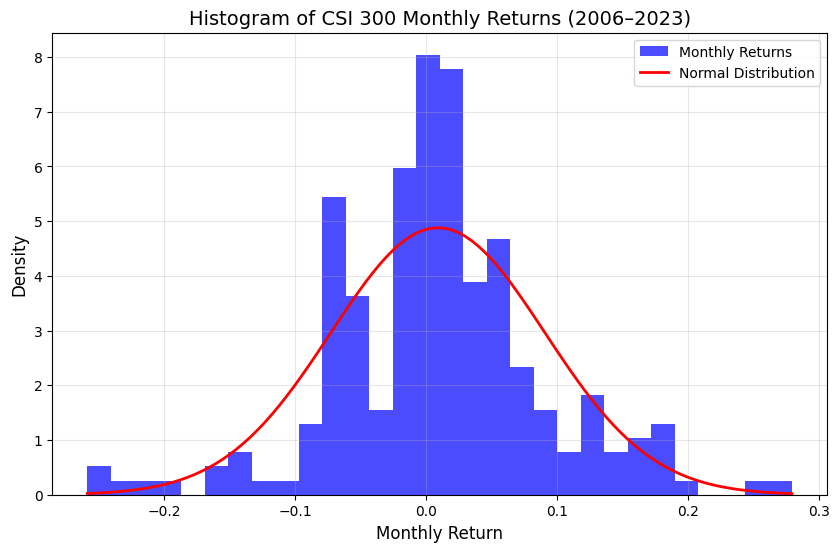

In [11]:
# Set figure size for clarity
plt.figure(figsize=(10, 6))

# Plot histogram of monthly returns
# bins=30 provides granularity for ~215 data points; density=True normalizes to a probability density
n, bins, patches = plt.hist(monthly_returns, bins=30, density=True, alpha=0.7, color='blue', label='Monthly Returns')

# Overlay a normal distribution curve for comparison
from scipy.stats import norm
mu, sigma = monthly_returns.mean(), monthly_returns.std()
x = np.linspace(min(monthly_returns), max(monthly_returns), 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=2, label='Normal Distribution')

# Add labels and title
plt.title('Histogram of CSI 300 Monthly Returns (2006–2023)', fontsize=14)
plt.xlabel('Monthly Return', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Display the plot
plt.show()

# (c)

In [13]:
from scipy.stats import shapiro

### Perform the Shapiro-Wilk Test

In [14]:
# Perform Shapiro-Wilk test
stat, p_value = shapiro(monthly_returns)

# Print results
print(f"Shapiro-Wilk Test Statistic: {stat:.6f}")
print(f"P-value: {p_value:.6f}")

Shapiro-Wilk Test Statistic: 0.971284
P-value: 0.000228


#### Details about the Shapiro-Wilk Test
The Shapiro-Wilk test evaluates whether a sample comes from a normally distributed population. Here’s how it works:
- **Test Statistic (W)**: Ranges from 0 to 1. A value close to 1 suggests the data is consistent with a normal distribution, while values further below 1 indicate deviations.
- **P-value**: The probability of observing the test statistic (or a more extreme value) under the null hypothesis ($H_0$: the data is normally distributed). A low p-value (typically < 0.05) leads to rejecting $H_0$, implying the data is not normally distributed.

For the above results:
- **W = 0.971284**: This is fairly close to 1, suggesting the distribution isn’t wildly different from normal, but it’s not perfect.
- **P-value = 0.000228**: This is well below the common significance level of 0.05, indicating strong evidence against normality.

#### Test Result Interpretation
The p-value of 0.000228 is tiny—much less than 0.05. Statistically, this means we reject the null hypothesis at the 5% significance level (and even at stricter levels like 1% or 0.1%). The CSI 300 monthly returns, based on this test alone, do not follow a normal distribution. The test statistic of 0.971284, while close to 1, isn’t enough to offset the p-value’s implication, especially with a sample size of around 215 monthly returns (assuming data from February 2006 to December 2023 after dropping the initial `NaN`).